## Find Prediction Range

Guess the predicitons corresponding to important values and detachment

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
from sklearn.cluster import KMeans

In [62]:
working_dir = '../data/labels/weighted_emission/all'
files = sorted(list(Path(working_dir).rglob('*.pkl')))
len_dir = len(list(Path(working_dir).rglob('*.pkl'))) // 2
print(len_dir)
r_file_idx = 1
z_file_idx = 0

26


In [59]:
r_arr_full = []
z_arr_full = []
for i in range(len_dir):
    rfi = r_file_idx + 2 * i
    zfi = z_file_idx + 2 * i
    
    r_arr = pickle.load(open(files[rfi], 'rb'))
    # print(f'loaded r: {files[rfi].stem}')
    # print(r_arr.shape)
    z_arr = pickle.load(open(files[zfi], 'rb'))
    # print(f'loaded z: {files[zfi].stem}')
    # print(z_arr.shape)
    
    r_arr_full.append(r_arr)
    z_arr_full.append(z_arr)

r_arr_flattened = np.concatenate(r_arr_full, axis=0)
z_arr_flattened = np.concatenate(z_arr_full, axis=0)

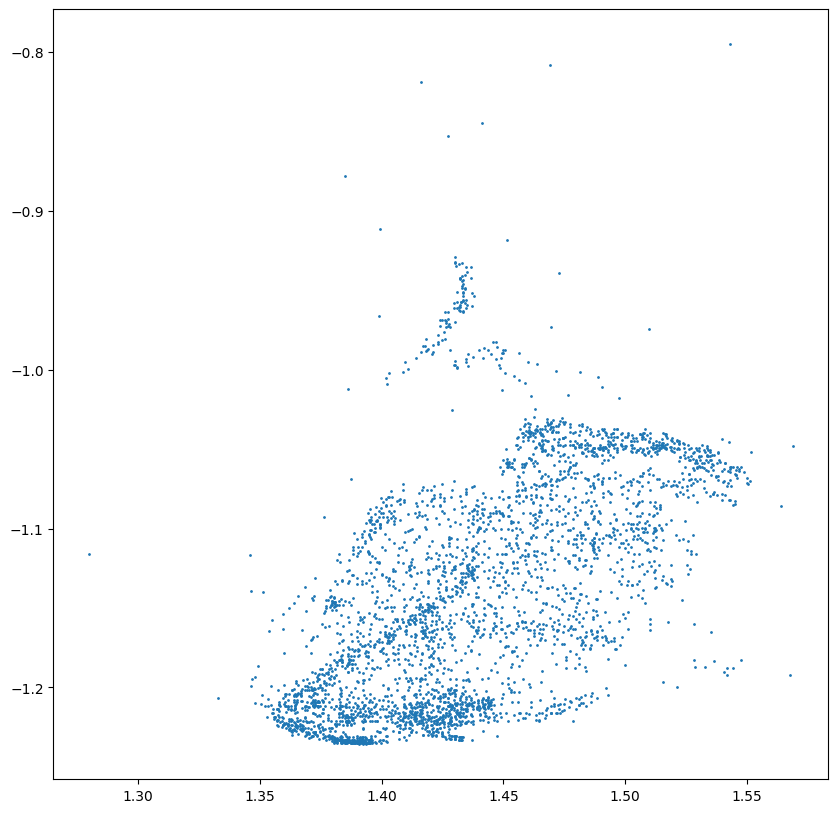

In [60]:
plt.figure(figsize=(10, 10))
plt.scatter(r_arr_flattened, z_arr_flattened, s=1)

In [127]:
dz_dir = '../data/processed/weight_ml_point/txt_files'
files = sorted(list(Path(dz_dir).rglob('*.txt')))
# files = [files]
for i, file in enumerate(files):
    print(i,file.stem)

0 189057
1 189061
2 189062
3 189081
4 189088
5 189090
6 189093
7 189094
8 189097
9 189100
10 189101
11 189448
12 189451
13 190109
14 190110
15 190113
16 190114
17 190115
18 190116
19 199166
20 199171
21 199172
22 199351
23 199352
24 199353
25 199354
26 200864
27 200865
28 200898
29 200910
30 200919
31 200933
32 200934
33 200935


In [124]:
dz_arr_full = []
for file in files:
    for line in open(file):
        dz = float(line.split(',')[1])
        dz_arr_full.append(dz)
dz_arr_full = np.array(dz_arr_full)
dz_arr_full = dz_arr_full[~np.isnan(dz_arr_full)]

# Remove outliers using IQR
Q1 = np.percentile(dz_arr_full, 5)
Q3 = np.percentile(dz_arr_full, 95)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dz_arr_full = dz_arr_full[(dz_arr_full >= lower_bound) & (dz_arr_full <= upper_bound)]


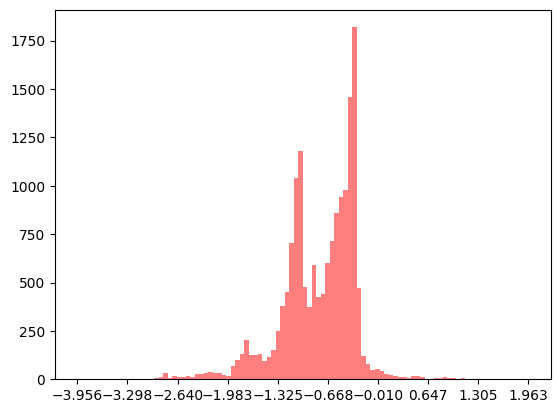

In [125]:
plt.hist(dz_arr_full, bins=100, alpha=0.5, color='r')
plt.xticks(np.linspace(dz_arr_full.min(), dz_arr_full.max(), 10))
plt.show()

Cluster 0 range: -0.7314417580294867 to 1.9625727298429019
Cluster 1 range: -1.4809876308714394 to -0.7319362372442086
Cluster 2 range: -3.955530095916883 to -1.4828552404399091


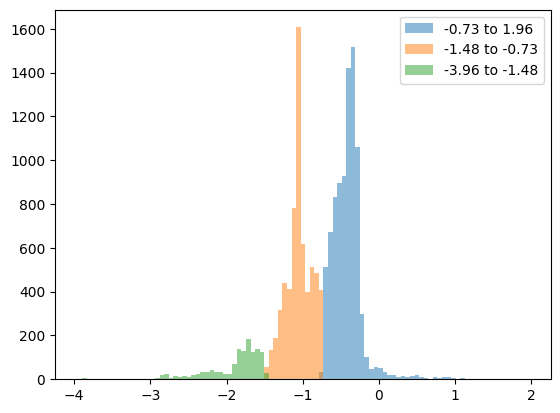

In [126]:
cluster_id = KMeans(3).fit_predict(dz_arr_full.reshape(-1, 1))
fig, ax = plt.subplots()
bins = np.linspace(dz_arr_full.min(), dz_arr_full.max(), 100)
for ii in np.unique(cluster_id):
    subset = dz_arr_full[cluster_id==ii]
    ax.hist(subset, bins=bins, alpha=0.5, label=f"{subset.min():.2f} to {subset.max():.2f}")
ax.legend()
for ii in np.unique(cluster_id):
    subset = dz_arr_full[cluster_id == ii]
    print(f"Cluster {ii} range: {subset.min()} to {subset.max()}")
plt.show()

In [8]:
fi = '/scratch/gpfs/nc1514/plasma-tv/data/processed/weight_ml_point/txt_files/200933.txt'

times = []
vals = []
with open(fi, 'r') as f:
    for line in f:
        time, val = line.split(',')
        times.append(float(time))
        vals.append(float(val))

In [9]:
print(times[30],vals[30])

0.010000000009313226 -1.1933383667472734
